In [1]:
from IPython.display import SVG, display, Markdown

In [2]:
import pandas as pd
dfGemiddeld_cijfer_WNS = pd.read_csv("Gemiddeld_cijfer_WNS")
dfGemiddeld_cijfer_WNS_n30 = pd.read_csv("Gemiddeld_cijfer_WNS_n30")
Gemiddeld_cijfer_WNS = dfGemiddeld_cijfer_WNS["Gemiddeld Cijfer WNS"]
Gemiddeld_cijfer_WNS_n30 = dfGemiddeld_cijfer_WNS_n30["Gemiddeld Cijfer WNS n30"]

# One-sample t-test

# 1 Toepassing
Gebruik de *one sample t-toets* om het gemiddelde van de steekproef te vergelijken met een bekend gemiddelde of norm van de totale populatie.[<sup>1</sup>](#Rapportage)


# 2 Onderwijscasus
De opleidingsdirecteur van de opleiding Werktuigbouwkunde wil weten of het gemiddelde eindexamencijfer voor de exacte vakken (Wiskunde, Natuurkunde en Scheikunde; WNS) van vwo studenten hoger is dan het landelijk gemiddelde (6,8).[<sup>2</sup>](#Rapportage)
Met deze gegevens probeert zij een inschatting te maken van het niveau van de studenten en kan zij bepalen of het curriculum van de inleidende vakken genoeg aansluit bij eerstejaars studenten met een vwo vooropleiding.

$H_0$: Het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die beginnen aan de Bachelor Werktuigbouwkunde is gelijk aan het landelijk gemiddelde: $\mu = 6,8$. 

$H_A$: Het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die beginnen aan de Bachelor Werktuigbouwkunde is anders dan het landelijk gemiddelde: $\mu \neq 6,8$.

# 3 Assumpties
Om een valide resultaat te bereiken moeten, voordat de toets kan worden uitgevoerd, de data aan een aantal voorwaarden voldoen. 

## 3.1 Normaliteit 
De *t-toets* gaat ervan uit dat de data van de steekproef normaal verdeeld zijn. Ga er bij een n > 100 vanuit dat de t-toets robuust genoeg is om uit te voeren zonder dat de data een normale verdeling volgen.[<sup>3</sup>](#Rapportage) 

Controleer de assumptie van normaliteit met de volgende stappen:  
1. Controleer de data visueel met een histogram, een boxplot of een Q-Q plot.   
2. Toets of de data normaal verdeeld zijn met de *Kolmogorov-Smirnov test* of bij een kleinere steekproef (n < 50[<sup>4</sup>](#Rapportage)) met de *Shapiro-Wilk test*.[<sup>5</sup>](#Rapportage) 

Als blijkt dat de data niet normaal verdeeld zijn, transformeer de data eventueel en bepaal daarna of deze wel normaal verdeeld zijn.

Als er geen sprake is van normaliteit, gebruik de *Wilcoxon Signed Rank Test*.[<sup>6,</sup>](#Rapportage)[<sup>7</sup>](#Rapportage)

# 4 Uitvoering in R

Er zijn twee datasets `Gemiddeld_cijfer_WNS` en `Gemiddeld_cijfer_WNS_n30` ingeladen met de gemiddelde eindexamencijfers van WNS van eerstejaars Werktuigbouwkunde. Het eerste bestand bevat 124 studenten en het tweede bevat 30 studenten.

## 4.1 De data bekijken
Gebruik `<dataframe>.head()` en `<dataframe>.tail()` om de structuur van de data te bekijken.

In [3]:
# Eerste 6 observaties
print(dfGemiddeld_cijfer_WNS.head(6))
# Laatste 6 observaties
print(dfGemiddeld_cijfer_WNS.tail(6))

   Gemiddeld Cijfer WNS
0              7.400000
1              7.366667
2              7.366667
3              7.666667
4              5.933333
5              6.500000
     Gemiddeld Cijfer WNS
118              6.333333
119              6.133333
120              8.066667
121              5.166667
122              7.700000
123              6.366667


Krijg meer inzicht in de dataset door het gemiddelde en de spreiding te bekijken, `len()`, `np.mean()` en `np.sqrt(np.var())`, door deze functies aan te roepen uit de package `numpy`.

In [4]:
## Gemiddelde en standaarddeviatie
import numpy as np
print(len(Gemiddeld_cijfer_WNS))

124


In [5]:
print(np.mean(Gemiddeld_cijfer_WNS))

7.128763440860214


In [6]:
print(np.sqrt(np.var(Gemiddeld_cijfer_WNS)))

0.78186587182893


## 4.2 Visuele inspectie van normaliteit
Geef normaliteit visueel weer met een histogram, boxplot of Q-Q plot. 

### 4.2.1 Histogram

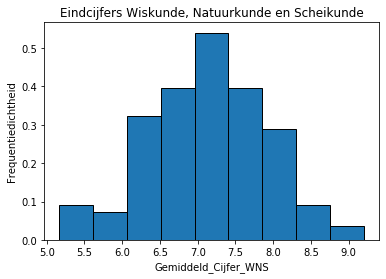

In [8]:
import matplotlib.pyplot as plt
plt.hist(Gemiddeld_cijfer_WNS, density = True, edgecolor = "black", bins = 9)
plt.title("Eindcijfers Wiskunde, Natuurkunde en Scheikunde")
plt.xlabel("Gemiddeld_Cijfer_WNS")
plt.ylabel("Frequentiedichtheid")
plt.show()

Het histogram laat een Bell Curve zien vergelijkbaar met een normale verdeling: veel waardes liggen rondom het gemiddelde en weinig bij de staarten van de verdeling. Daarnaast ziet de verdeling er in grote mate symmetrisch uit.

### 4.2.2 Q-Q Plot

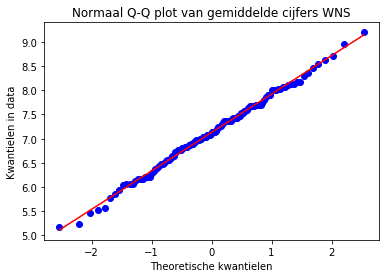

In [9]:
import scipy.stats as stats
stats.probplot(Gemiddeld_cijfer_WNS, dist="norm", plot=plt)
plt.title("Normaal Q-Q plot van gemiddelde cijfers WNS")
plt.xlabel("Theoretische kwantielen")
plt.ylabel("Kwantielen in data")
plt.show()

In deze casus liggen de meeste punten op de lijn. Bij de uiteinden liggen de punten dichtbij de lijn. 

### 4.2.3 Boxplot

De box geeft de middelste 50% van de tentamencijfers weer. De zwarte lijn binnen de box is de mediaan. In de staarten zitten de eerste 25% en de laatste 25%. Cirkels visualiseren mogelijke uitbijters.[<sup>1</sup>](#Rapportage)

Text(0, 0.5, 'Gemiddeld_cijfer_WNS')

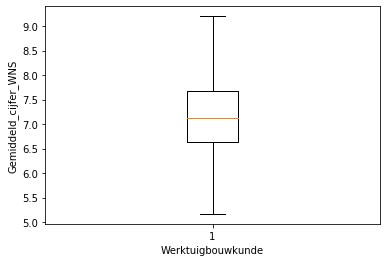

In [10]:
plt.boxplot(Gemiddeld_cijfer_WNS)
plt.xlabel("Werktuigbouwkunde")
plt.ylabel("Gemiddeld_cijfer_WNS")

De boxplot geeft de spreiding van het gemiddelde eindexamencijfer voor de exacte vakken weer van de studenten Werktuigbouwkunde. De box en staarten zien er symmetrisch uit, wat een indicatie is van een normale verdeling. 

## 4.3 Toetsen van normaliteit
Om te controleren of de data normaal verdeeld zijn, kan de normaliteit getoetst worden. Hierbij een toelichting bij twee veelgebruikte toetsen: de *Kolmogorov-Smirnov test* en de *Shapiro-Wilk test*.

### 4.3.1 Kolmogorov-Smirnov
De *Kolmogorov-Smirnov test* toetst het verschil in vorm tussen twee verdelingen. Standaard toetst deze test het verschil tussen een normale verdeling en de verdeling van de steekproef. De Lilliefors correctie wordt gebruikt als het gemiddelde niet 0 is en de standaardafwijking niet 1 is. Als de p-waarde < 0,05 is de verdeling van de data statistisch significant verschillend van de normale verdeling.

In [11]:
import statsmodels.stats.api
print(statsmodels.stats.api.lilliefors(Gemiddeld_cijfer_WNS))

(0.04110412174561617, 0.2)


De p-waarde is *p* > 0,05, dus er is geen statistisch significant verschil gevonden tussen de verdeling van de steekproef en de normale verdeling. De *one sample-t-toets* kan uitgevoerd worden. 

### 4.3.2 Shapiro-Wilk Test
De Shapiro-Wilk test is een soortgelijke test als de Kolmogorov-Smirnov test en wordt vooral gebruikt bij kleine steekproeven (n < 50). Als de p-waarde < 0,05 is de verdeling van de data significant verschillend van de normale verdeling.

De dataset met `Gemiddeld_cijfer_WNS_n30` is ingeladen met de gemiddelde eindexamencijfers van WNS van eerstejaars Werktuigbouwkunde, *n* = 30.

In [12]:
print(stats.shapiro(Gemiddeld_cijfer_WNS_n30))

(0.9815859198570251, 0.8659763336181641)


De p-waarde is *p* > 0,05, dus er is geen statistisch significant verschil gevonden tussen de verdeling van de steekproef en de normale verdeling. De *one sample-t-toets* kan uitgevoerd worden.

##  4.4 One sample t-toets
Gebruik `stats.ttest()`om een t-toets uit te voeren. Geef het gemiddelde waarmee wordt vergeleken en specifieer welke alternatieve hypothese er getoetst wordt. 

De dataset met `Gemiddeld_cijfer_WNS` is ingeladen met de gemiddelde eindexamencijfers van WNS van eerstejaars Werktuigbouwkunde, *n* = 124. 
De *one sample t-toets* is uitgevoerd om de vraag te beantwoorden of het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die beginnen aan de Bachelor Werktuigbouwkunde hoger is dan het landelijk gemiddelde (µ = 6,8). De verwachting is dat de studenten hoger scoren, maar omdat het relevant om te weten of de studenten ook lager scoren dan het landelijk gemiddelde is er voor gekozen om tweezijdig te toetsen. 

In [13]:
# T-test
print(stats.ttest_1samp(Gemiddeld_cijfer_WNS, popmean = 6.8))

Ttest_1sampResult(statistic=4.663412324551201, pvalue=7.970241179899989e-06)


* Vrijheidsgraden, *df* = *n* - 1 = 123  
* *t* (123) = 4,66`, *p* < 0,01
* p-waarde < 0,05, dus de $H_0$ wordt verworpen en de $H_A$ wordt aangenomen [<sup>9</sup>](#Rapportage)
* 95%-betrouwbaarheidsinterval: bij het herhalen van het onderzoek zal in 95% van de gevallen de µ in het interval vallen. In deze casus is het interval tussen 6,99 en 7,27.
* Het gemiddelde van de steekproef is 7,13.

# Rapportage
De *one sample t-toets* is uitgevoerd om te toetsen of het gemiddelde eindexamencijfer voor de exacte vakken van vwo studenten die Werktuigbouwkunde zijn gaan studeren anders is dan het landelijk gemiddelde. Het gemiddelde van de steekproef (*M* = 7,13, *SD* = 0,79) is statistisch significant hoger dan het landelijk gemiddelde van 6,8, *t* (123) = 4,66, *p* < 0,01. 

De resultaten ondersteunen de conclusie dat het gemiddelde eindexamencijfer voor de exacte vakken van studenten Werktuigbouwkunde met een vwo vooropleiding hoger ligt dan het landelijk gemiddelde.

1. van Geloven, N. (25 mei 2016). *T-toets* [Wiki Statistiek Academisch Medisch Centrum](https://wikistatistiek.amc.nl/index.php/T-toets#one_sample_t-toets). 
2.  Centraal Instituut voor Toetsontwikkeling (2018). *Examenverslag 2018*. https://www.cito.nl/onderwijs/voortgezet-onderwijs/centrale-examens-voortgezet-onderwijs/tools-en-informatie-voor-docenten/examenverslagen/examenverslag-2018
3. Lumley, T., Diehr, P., Emerson, S., & Chen, L. (2002). The importance of the normality assumption in large public health data sets. Annu Rev Public Health, 23, 151-69. doi: 10.1146/annurev.publheath.23.100901.140546 http://rctdesign.org/techreports/arphnonnormality.pdf
4. Laerd statistics (2018). [Testing for Normality using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php).  
5. Normaliteit. (14 juli 2014). [UvA Wiki Methodologiewinkel](https://wiki.uva.nl/methodologiewinkel/index.php/Normaliteit).
6. De *Wilcoxon Signed Rank Test* maakt een rangschikking van de data. Hierdoor is de test verdelingsvrij en is normaliteit geen assumptie. Ook zijn uitbijters minder van invloed op het eindresultaat. Toch wordt er voor deze test minder vaak gekozen, dit komt doordat bij het maken van een rankschikking de data informatie verliest. Als de data wel normaal verdeeld is heeft de *Wilcoxon Signed Rank Test* minder onderscheidend vermogen, dan wanneer de *one sample t-toets* uitgevoerd zou worden. 
7. Prabhakaran, S. (2016-2017). *Statistical Tests*. http://r-statistics.co/Statistical-Tests-in-R.html  
8. Uitbijters kunnen bepalend zijn voor de uitkomst van toetsen. Bekijk of de uitbijters valide uitbijters zijn en niet een meetfout of op een andere manier incorrect verkregen data. Het weghalen van uitbijters kan de uitkomst ook vertekenen, daarom is het belangrijk om verwijderde uitbijters te melden in een rapport. 
9. In dit voorbeeld wordt eruit gegaan van een waarschijnlijkheid van 95% en zodoende een p-waardegrens van 0,05. Dit is naar eigen inzicht aan te passen. Hou hierbij rekening met type I en type II fouten.